Rahiemy (2025)

I will try to evaluate some equations of state that were previously calculated analytically into numerical ones so that they can be calculated for more general systems.

# Equations of state
After evaluating the expected value (not written here), the field equation of motion is obtained;
\begin{align}
\phi_0 &= \frac{g_s}{m^2_s} \langle \bar{\psi} \psi \rangle = \frac{g_s}{m^2_s} \frac{\gamma}{2\pi^2} \int^{k_F}_0 dk \frac{k^2m^*}{\sqrt{k^2+m^{*2}}} \\
V_0 &= \frac{g_v}{m^2_\omega} \langle \psi^\dagger \psi \rangle = \frac{g_v}{m^2_\omega} \rho
\end{align}
where $\gamma$ is the nucleon spin degeneracy of the state.

Using effective mass $m*$ equation,
\begin{equation}
m^*=M-\frac{g^2_s}{m^2_s}\frac{\gamma}{2\pi^2} \int^{k_F}_0 dk \frac{k^2m^*}{\sqrt{k^2+m^{*2}}}
\end{equation}
and using spherical symmetry, the energy density and pressure can be written as
\begin{align}
\epsilon&=\frac{1}{2}m^2_s\phi^2_0+\frac{1}{2} m^2_\omega V^2_0 + \frac{\gamma}{2\pi^2} \int^{k_f}_0 dk k^2 \sqrt{k^2+m^{*2}}\\
P &= - \frac{1}{2}m^2_s\phi^2_0+\frac{1}{2} m^2_\omega V^2_0 + \frac{1}{3} (\frac{\gamma}{2\pi^2} \int^{k_f}_0 dk \frac{k^4}{\sqrt{k^2+m^{*2}}})
\end{align}

From the equations of state above, there are 3 types of integrals that can be solved analytically in Appendix B of Diener's thesis (2008).

# Calculating the effective mass integral or phi meson

In [38]:
get_ipython().system('sudo apt-get update')
get_ipython().system('sudo apt-get install -y texlive-latex-base texlive-latex-extra texlive-fonts-recommended dvipng')

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [80.4 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,237 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/mai

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import numpy.polynomial.legendre as geek
import math

In [2]:
# Meson integran function
def fungmeson(k, Meff):
    return k ** 2 * Meff / np.sqrt(k ** 2 + Meff ** 2)

In [3]:
# numerical quadrature function
def kuad_meson(a,b,Meff):
    n = 20
    x,w = geek.leggauss(n)
    sum = 0.0
    for i in range(n):
      y = (b-a)*x[i]/2.0 + (b+a)/2.0
      sum += w[i] * fungmeson(y,Meff)
    kuad = (b-a) * sum/2.0
    return kuad

In [9]:
gamma_list=[2,4]
hc = 197.3269804
M=939
kf_list = [x/100 for x in range(1,601)] # kf from 0 to 6

# Calculating integral based on variation of kf value
Integ_list = [] # List to store gaussian quadrature numerical results
Integ_list_sw = [] # List to store serot-walecka numerical results

# numerik gaussian quadrature
for kf in kf_list:
  kf_scaled = hc * kf
  integ = kuad_meson(0, kf_scaled, M)
  Integ_list.append(integ)

# analitik serot-walecka
for kf in kf_list:
  kf_scaled = hc * kf
  efef = (kf_scaled**2 + M**2)**0.5
  integ_sw = M/2 *(kf_scaled * efef - M**2 * np.log((kf_scaled + efef) / M))
  Integ_list_sw.append(integ_sw)

# Ensure that all lists have the same length as kf_list
assert len(Integ_list) == len(kf_list)
assert len(Integ_list_sw) == len(kf_list)

/tmp/ipython-input-2277513383.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, Integ_list, label='Gaussian quadrature', linewidth=4)


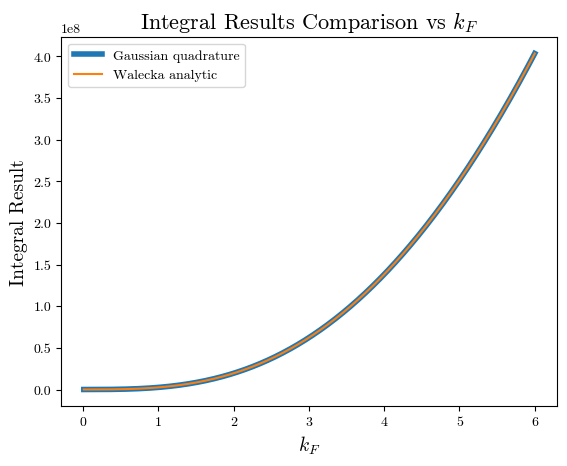

In [41]:
plt.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "cm",
    "font.family": "cmr10",
})

# Plot
#plt.figure(figsize=(8, 6))
plt.plot(kf_list, Integ_list, label='Gaussian quadrature', linewidth=4)
plt.plot(kf_list, Integ_list_sw, label='Walecka analytic')
plt.xlabel(r'$k_F$', fontsize=14)
plt.ylabel(r'Integral Result', fontsize=14)
plt.title('Integral Results Comparison vs $k_F$', fontsize=16)
plt.legend(loc='best')
plt.show()

/tmp/ipython-input-3531399314.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, Integ_list_sw, color='green')


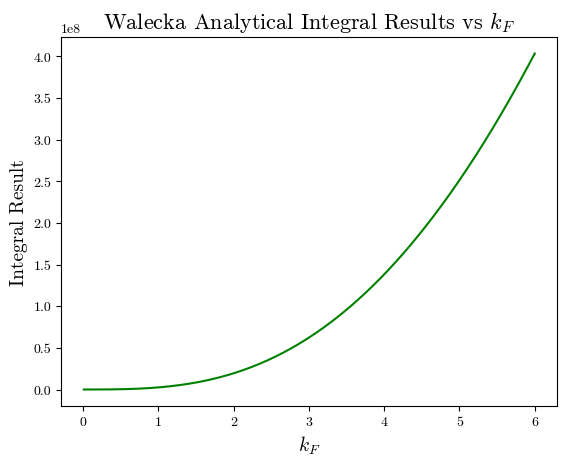

/tmp/ipython-input-3531399314.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, Integ_list, color='blue')


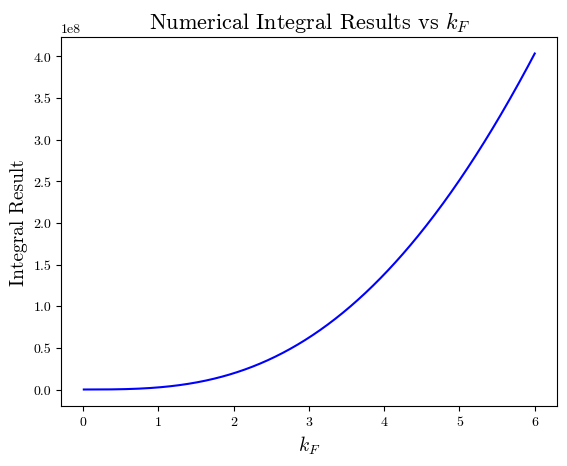

In [42]:
plt.plot(kf_list, Integ_list_sw, color='green')
plt.xlabel(r'$k_F$', fontsize=14)
plt.ylabel(r'Integral Result', fontsize=14)
plt.title('Walecka Analytical Integral Results vs $k_F$', fontsize=16)
# plt.legend(loc='best')
plt.show()

plt.plot(kf_list, Integ_list, color='blue')
plt.xlabel(r'$k_F$', fontsize=14)
plt.ylabel(r'Integral Result', fontsize=14)
plt.title('Numerical Integral Results vs $k_F$', fontsize=16)
# plt.legend(loc='best')
plt.show()

# Calculating Effective Mass (Numerical)
$$\int^{k_F}_0 dk \frac{k^2m^*}{\sqrt{k^2+m^{*2}}} $$

In [12]:
# Using another QHD-I Parameter Set (Walecka, 1974)
gamma_list = [2,4]
hc = 197.3269804
pi = math.pi
M = 939
M2 = M**2
ms = 550
mv = 783
cs2 = 266.9   # cs^2 = gs^2 * (M/ms)^2
cv2 = 195.7
ms2 = ms**2
mv2 = mv**2
gs2 = cs2*ms2/M2
gv2 = cv2*mv2/M2
gs = gs2**0.5

In [13]:
# Secant Method
def secant(f, x0):
    flag = 1
    h = 0.01
    x1 = x0
    f1 = f(x1)
    x2 = x1 + x1*h
    f2 = f(x2)
    for i in range(1000):
        x = x2 - f2*(x2-x1)/(f2-f1)
        if abs(x-x2)<0.001:
            flag = 0
            break
        x1 = x2
        if(x<0):
            x = 0.1
        x2 = x
        f1 = f(x1)
        f2 = f(x2)
    if abs(flag-1)<0.001:
        print('No Convergence')
        x = 0
    return x

In [15]:
kf_list = [x / 100 for x in range(1, 601)]

# Numerical integral list
Meff_list = []
E_list = []
logE_list = []
BE_list = []
P_list = []
logP_list = []
phi_list = []
# Analytical integral list
Meff_list_a = []
E_list_a = []
logE_list_a = []
BE_list_a = []
P_list_a = []
logP_list_a = []
phi_list_a = []

# Define effective mass fuction
def f(x, kf, gamma): #numerical
    integral_val = kuad_meson(0, kf, x)  # Using x as Meff
    s = x - M + (cs2 * gamma / (2.0 * np.pi ** 2 * M2)) * integral_val
    return s
def fa(x): #analytic
    efef=(kf**2+x**2)**0.5
    s = x - M + cs2*gamma*x/(4.0*np.pi**2*M2)*(kf*efef-x**2*np.log((kf+efef)/x))
    return s

# Calculating each variable for numerical evaluation
for gamma in gamma_list:
    # New list for numerical integral
    Meff_list.append([])
    E_list.append([])
    logE_list.append([])
    BE_list.append([])
    P_list.append([])
    logP_list.append([])
    phi_list.append([])

    for kf in kf_list:
        kf_scaled = hc * kf
        rhoB = gamma * (kf_scaled**3) / (6 * (pi**2))
        # Secant method for calculating Meff
        Meff0 = M  # Initialization
        Meff = secant(lambda x: f(x, kf_scaled, gamma), Meff0)
        if abs(Meff - 0) < 0.001 or Meff < 0:
            Meff = Meff0
        Meff_list[-1].append(Meff / M)  # Append on loop kf

        # efef definition
        efef = (kf_scaled**2 + Meff**2)**0.5

        # Calculate E and P with defined efef
        E = cv2 * (rhoB**2) / (2 * (M**2)) + (M**2) * ((M - Meff)**2) / (2 * cs2) \
            + gamma * (kf_scaled * efef * (kf_scaled**2 + efef**2) - (Meff**4) * np.log((kf_scaled + efef) / Meff)) / ((4 * pi)**2)

        P = cv2 * (rhoB**2) / (2 * (M**2)) - (M**2) * ((M - Meff)**2) / (2 * cs2) \
            + gamma * (kf_scaled * efef * (2 * kf_scaled**2 - 3 * Meff**2) + 3 * (Meff**4) * np.log((kf_scaled + efef) / Meff)) / (3 * (4 * pi)**2)

        phi = (cs2 * gamma * Meff / (4.0 * np.pi ** 2 * M2)) * kuad_meson(0, kf, Meff)

        phi_list[-1].append(phi)
        E_list[-1].append(E / (hc**3))
        BE_list[-1].append(E / rhoB - M)
        P_list[-1].append(P / (hc**3))

        if (P>0):
           logE_list[-1].append(np.log10(E*1.782661921e12/(hc**3)))
           logP_list[-1].append(np.log10(P*1.602176634e33/(hc**3)))

#  Analytics evaluation
for gamma in gamma_list:
    # New list
    Meff_list_a.append([])
    E_list_a.append([])
    logE_list_a.append([])
    BE_list_a.append([])
    P_list_a.append([])
    logP_list_a.append([])
    phi_list_a.append([])

    for kf in kf_list:
        kf = hc*kf
        rhoB = gamma*(kf**3)/(6*(pi**2))
        Meff0 = M
        Meff = secant(fa, Meff0)

        if abs(Meff-0)<0.001 or Meff<0:
            Meff = Meff0
        Meff_list_a[-1].append(Meff/M)
        efef=(kf**2+Meff**2)**0.5

        E=cv2*(rhoB**2)/(2*(M**2)) + (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(kf**2+efef**2)-(Meff**4)*np.log((kf+efef)/Meff))/((4*pi)**2)
        P=cv2*(rhoB**2)/(2*(M**2)) - (M**2)*((M-Meff)**2)/(2*cs2)+gamma*(kf*efef*(2*kf**2-3*Meff**2)+3*(Meff**4)*np.log((kf+efef)/Meff))/(3*(4*pi)**2)
        phi = gs2*gamma*Meff/(4.0*pi**2*ms**2)*(kf*efef-Meff**2*np.log((kf+efef)/Meff))

        phi_list_a[-1].append(phi)
        E_list_a[-1].append(E/(hc**3))
        BE_list_a[-1].append(E/rhoB - M)
        P_list_a[-1].append(P/(hc**3))

        if (P>0):
           logE_list_a[-1].append(np.log10(E*1.782661921e12/(hc**3)))
           logP_list_a[-1].append(np.log10(P*1.602176634e33/(hc**3)))

/tmp/ipython-input-2284202436.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, Meff_list[0], label='Numerical Neutron Matter', linestyle='--', linewidth=4, color='orange')


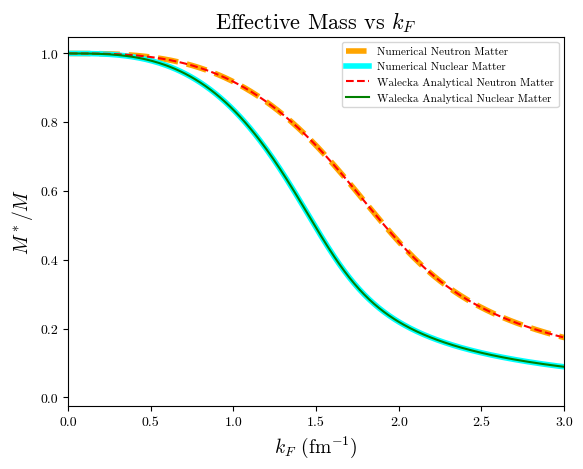

In [43]:
# Effective mass Plot
# plt.figure(figsize=(8, 6))
plt.plot(kf_list, Meff_list[0], label='Numerical Neutron Matter', linestyle='--', linewidth=4, color='orange')
plt.plot(kf_list, Meff_list[1], label='Numerical Nuclear Matter', linestyle='-', linewidth=4, color='cyan')
plt.plot(kf_list, Meff_list_a[0], label='Walecka Analytical Neutron Matter', linestyle='--', color='red')
plt.plot(kf_list, Meff_list_a[1], label='Walecka Analytical Nuclear Matter', linestyle='-', color='green')
plt.xlabel(r'$k_F$ (fm$^{-1}$)', fontsize=14)
plt.ylabel(r'$M^*/M$', fontsize=14)
plt.title('Effective Mass vs $k_F$', fontsize=16)
plt.xlim(0, 3)
plt.legend(loc='best')
plt.legend(fontsize=8)
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:13: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:13: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-1808397971.py:2: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(kf_list, Meff_list[0], label='Numerical Neutron Matter ($\gamma=2$)', linestyle='--')
/tmp/ipython-input-1808397971.py:3: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(kf_list, Meff_list[1], label='Numerical Nuclear Matter ($\gamma=4$)', linestyle='-')
/tmp/ipython-input-1808397971.py:12: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(kf_list, Meff_list_a[0], label='Walecka Analytical Neutron Matter ($\gamma=2$)', linestyle='--')
/tmp/ipython-input-1808397971.py:13: SyntaxWarning: in

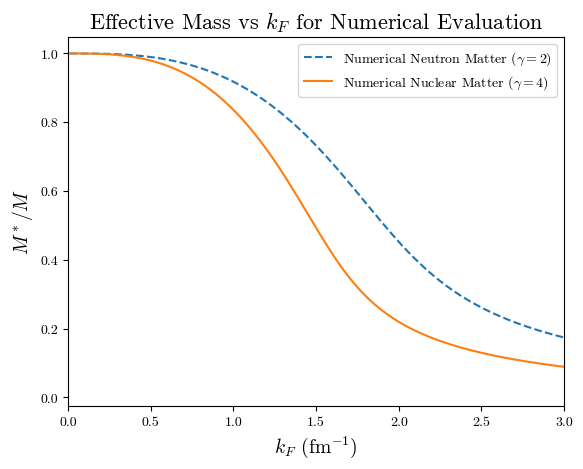

/tmp/ipython-input-1808397971.py:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, Meff_list_a[0], label='Walecka Analytical Neutron Matter ($\gamma=2$)', linestyle='--')


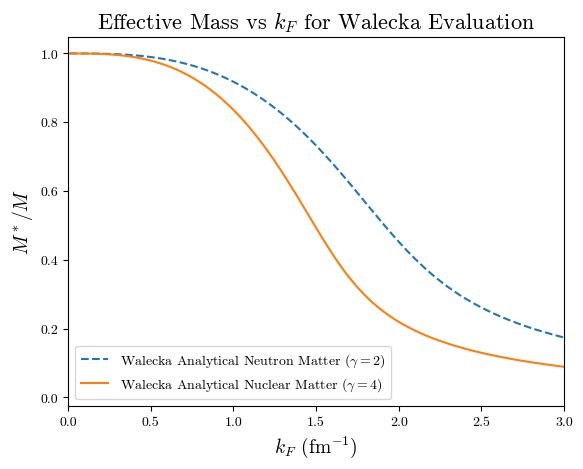

In [47]:
# Numerical effective mass
plt.plot(kf_list, Meff_list[0], label='Numerical Neutron Matter ($\gamma=2$)', linestyle='--')
plt.plot(kf_list, Meff_list[1], label='Numerical Nuclear Matter ($\gamma=4$)', linestyle='-')
plt.xlabel(r'$k_F$ (fm$^{-1}$)', fontsize=14)
plt.ylabel(r'$M^*/M$', fontsize=14)
plt.title('Effective Mass vs $k_F$ for Numerical Evaluation', fontsize=16)
plt.xlim(0, 3)
plt.legend(loc='best')
plt.show()

# Analytical effective mass
plt.plot(kf_list, Meff_list_a[0], label='Walecka Analytical Neutron Matter ($\gamma=2$)', linestyle='--')
plt.plot(kf_list, Meff_list_a[1], label='Walecka Analytical Nuclear Matter ($\gamma=4$)', linestyle='-')
plt.xlabel(r'$k_F$ (fm$^{-1}$)', fontsize=14)
plt.ylabel(r'$M^*/M$', fontsize=14)
plt.title('Effective Mass vs $k_F$ for Walecka Evaluation', fontsize=16)
plt.xlim(0, 3)
plt.legend(loc='best')
plt.show()

# Saturation Curve Plot

/tmp/ipython-input-4184244522.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, BE_list[0], label='Numerical Neutron Matter', linestyle='--', linewidth=4, color='orange')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


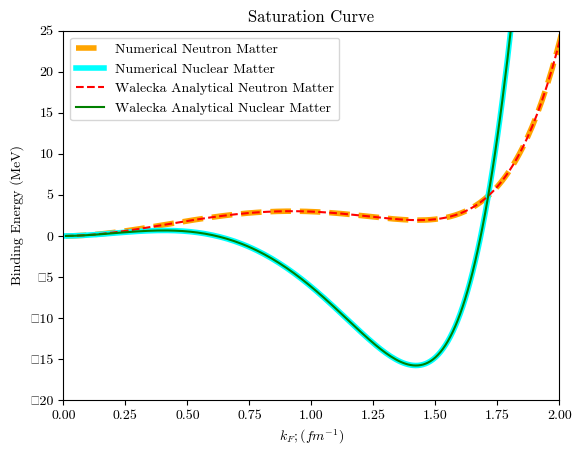

/tmp/ipython-input-4184244522.py:15: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, BE_list_a[0], label='Neutron Matter')


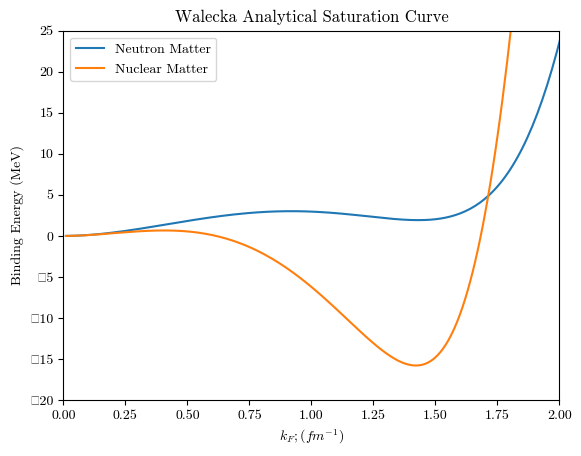

/tmp/ipython-input-4184244522.py:26: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, BE_list[0], label='Neutron Matter')


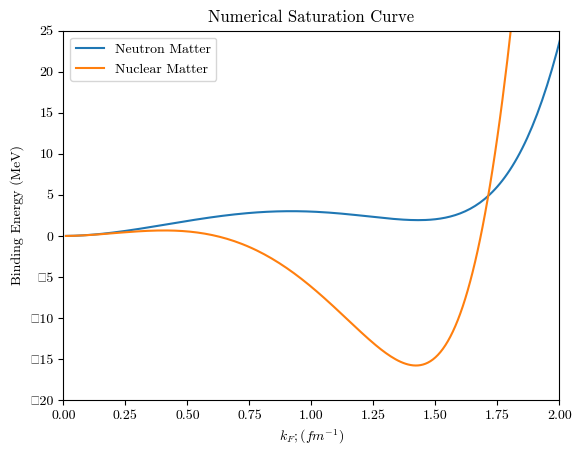

In [48]:
plt.plot(kf_list, BE_list[0], label='Numerical Neutron Matter', linestyle='--', linewidth=4, color='orange')
plt.plot(kf_list, BE_list[1], label='Numerical Nuclear Matter', linestyle='-', linewidth=4, color='cyan')
plt.plot(kf_list, BE_list_a[0], label='Walecka Analytical Neutron Matter', linestyle='--', color='red')
plt.plot(kf_list, BE_list_a[1], label='Walecka Analytical Nuclear Matter', linestyle='-', color='green')

ax = plt.gca()
ax.set_xlim([0, 2.0])
ax.set_ylim([-20, 25])
plt.title('Saturation Curve')
plt.ylabel('Binding Energy (MeV)')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.show()

plt.plot(kf_list, BE_list_a[0], label='Neutron Matter')
plt.plot(kf_list, BE_list_a[1], label='Nuclear Matter')
ax = plt.gca()
ax.set_xlim([0, 2.0])
ax.set_ylim([-20, 25])
plt.title('Walecka Analytical Saturation Curve')
plt.ylabel('Binding Energy (MeV)')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.show()

plt.plot(kf_list, BE_list[0], label='Neutron Matter')
plt.plot(kf_list, BE_list[1], label='Nuclear Matter')
ax = plt.gca()
ax.set_xlim([0, 2.0])
ax.set_ylim([-20, 25])
plt.title('Numerical Saturation Curve')
plt.ylabel('Binding Energy (MeV)')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.show()

# Pressure Plot

/tmp/ipython-input-2821196489.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, P_list_a[0], label='Walecka Analytical Neutron Matter')


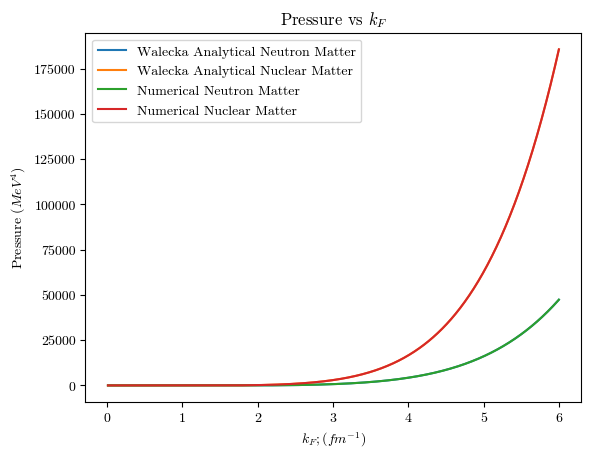

/tmp/ipython-input-2821196489.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, P_list_a[0], label='Walecka Analytical Neutron Matter')


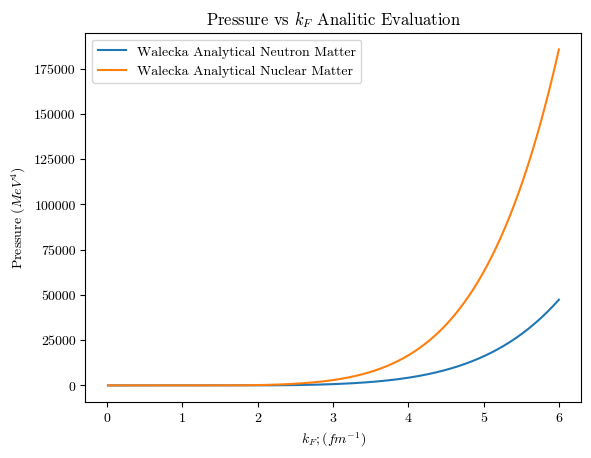

/tmp/ipython-input-2821196489.py:25: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(kf_list, P_list[0], label='Numerical Neutron Matter')


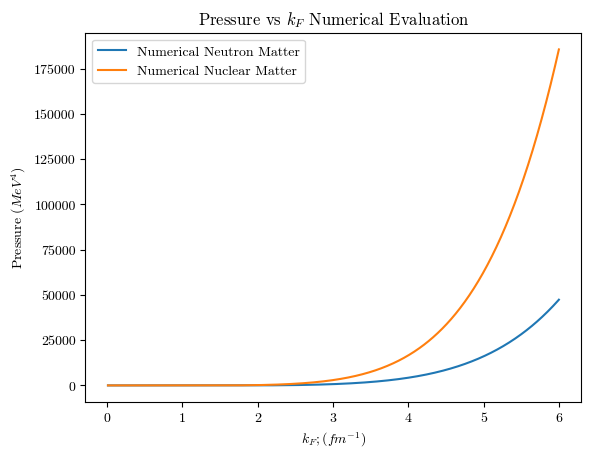

In [49]:
plt.plot(kf_list, P_list_a[0], label='Walecka Analytical Neutron Matter')
plt.plot(kf_list, P_list_a[1], label='Walecka Analytical Nuclear Matter')
plt.plot(kf_list, P_list[0], label='Numerical Neutron Matter')
plt.plot(kf_list, P_list[1], label='Numerical Nuclear Matter')
ax = plt.gca()
# ax.set_xlim([0, 4])
# ax.set_ylim([-100, 1e4])
plt.title('Pressure vs $k_F$')
plt.ylabel('Pressure $(MeV^{4})$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.show()

plt.plot(kf_list, P_list_a[0], label='Walecka Analytical Neutron Matter')
plt.plot(kf_list, P_list_a[1], label='Walecka Analytical Nuclear Matter')
ax = plt.gca()
# ax.set_xlim([0, 4])
# ax.set_ylim([-100, 1e4])
plt.title('Pressure vs $k_F$ Analitic Evaluation')
plt.ylabel('Pressure $(MeV^{4})$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.show()

plt.plot(kf_list, P_list[0], label='Numerical Neutron Matter')
plt.plot(kf_list, P_list[1], label='Numerical Nuclear Matter')
ax = plt.gca()
# ax.set_xlim([0, 4])
# ax.set_ylim([-100, 1e4])
plt.title('Pressure vs $k_F$ Numerical Evaluation')
plt.ylabel('Pressure $(MeV^{4})$')
plt.xlabel('$k_{F}; (fm^{-1})$')
plt.legend()
plt.show()


# Logarithmic Plot

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:14: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:14: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1282946896.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$Log_{10}P \ (dy/cm^2)$')
/tmp/ipython-input-1282946896.py:14: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel('$Log_{10}E \ (g/cm^3)$')
/tmp/ipython-input-1282946896.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(logE_list[0], logP_list[0], label='Numerics', linewidth=4,)


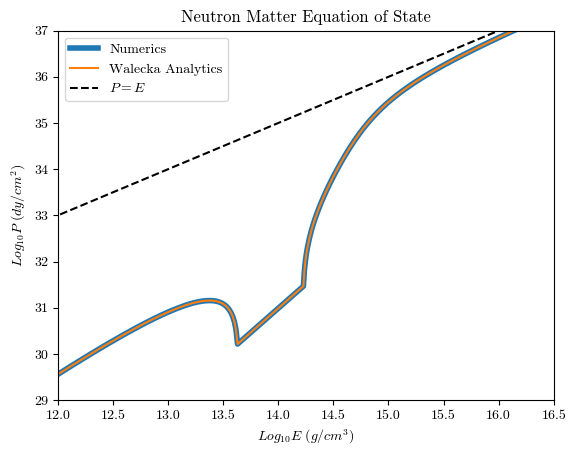

In [84]:
x_min, x_max = 0, 40
x_line = np.linspace(x_min, x_max, 100)
y_line = x_line +21 # p = ε and we corrected the units

# P vs E logarithmic graph
plt.plot(logE_list[0], logP_list[0], label='Numerics', linewidth=4,)
plt.plot(logE_list_a[0], logP_list_a[0], label='Walecka Analytics')
plt.plot(x_line, y_line, label=r'$P=E$', linestyle='--', color='black')
ax = plt.gca()
ax.set_xlim([12, 16.5])
ax.set_ylim([29, 37])
plt.title('Neutron Matter Equation of State')
plt.ylabel('$Log_{10}P \ (dy/cm^2)$')
plt.xlabel('$Log_{10}E \ (g/cm^3)$')
plt.legend()
plt.show()

# plt.plot(logE_list_a[0], logP_list_a[0], label='Analitik')
# ax = plt.gca()
# plt.title('Persamaan Keadaan Materi Neutron Analitik')
# plt.ylabel('$Log_{10}P$')
# plt.xlabel('$Log_{10}E$')
# plt.legend()
# plt.show()

# plt.plot(logE_list[0], logP_list[0], label='Numerik')
# ax = plt.gca()
# plt.title('Persamaan Keadaan Materi Neutron Numerik')
# plt.ylabel('$Log_{10}P$')
# plt.xlabel('$Log_{10}E$')
# plt.legend()
# plt.show()